In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import statsmodels.api as sm

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


[Text(0.5, 1.0, 'Median value of owner-occupied homes')]

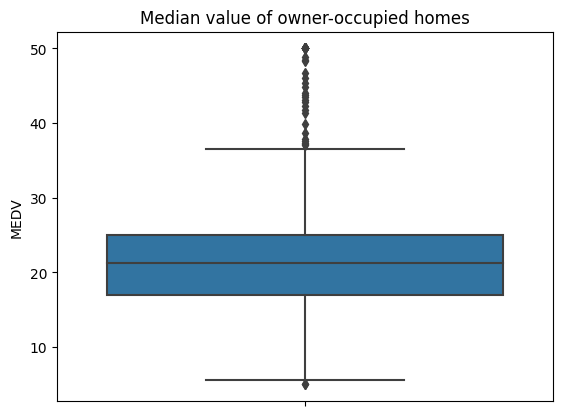

In [11]:
sns.boxplot(y=boston_df['MEDV']).set(title = 'Median value of owner-occupied homes')

In [15]:
boston_df['CHAS'].describe()

count    506.000000
mean       0.069170
std        0.253994
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: CHAS, dtype: float64

In [35]:
zero = boston_df.loc[boston_df['CHAS']== 0]
one = boston_df.loc[boston_df['CHAS']== 1]
X = pd.DataFrame()
X['zero']=zero['CHAS']
X['one']=one['CHAS']

[Text(0.5, 1.0, ' the Charles river variable')]

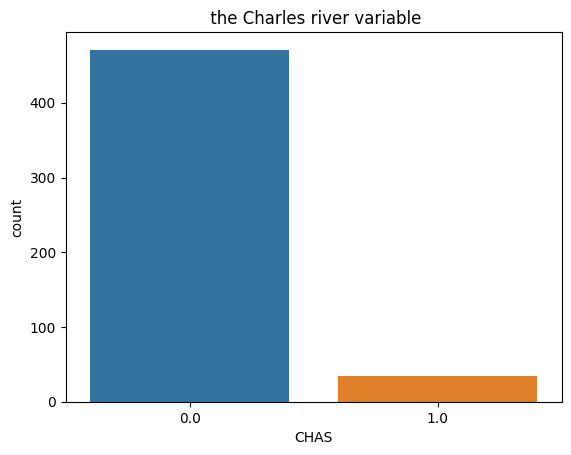

In [40]:
sns.countplot(data=boston_df,x='CHAS').set(title=' the Charles river variable')

In [42]:
boston_df.loc[(boston_df['AGE'] < 35),'age_range'] = 'under 35'
boston_df.loc[(boston_df['AGE'] < 70) & (boston_df['AGE'] > 35),'age_range'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE'] > 70),'age_range'] = 'above 70'

[Text(0.5, 1.0, 'the MEDV variable vs the AGE variable')]

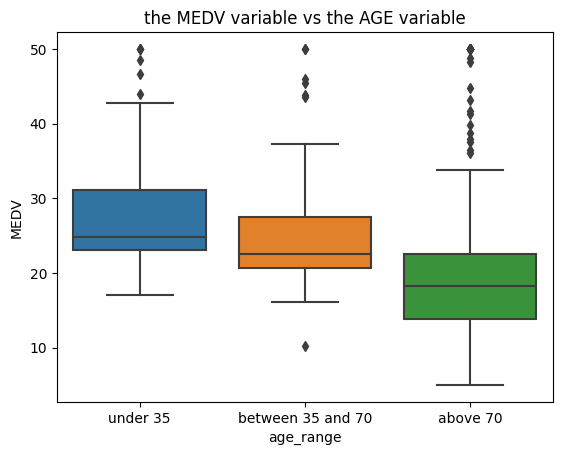

In [46]:
sns.boxplot(y=boston_df['MEDV'],x=boston_df['age_range'],order = ['under 35','between 35 and 70','above 70']).set(title = 'the MEDV variable vs the AGE variable')

In [48]:
boston_df['NOX']

0      0.538
1      0.469
2      0.469
3      0.458
4      0.458
       ...  
501    0.573
502    0.573
503    0.573
504    0.573
505    0.573
Name: NOX, Length: 506, dtype: float64

[Text(0.5, 1.0, 'Nitric oxide concentrations VS the proportion of non-retail business acres per town')]

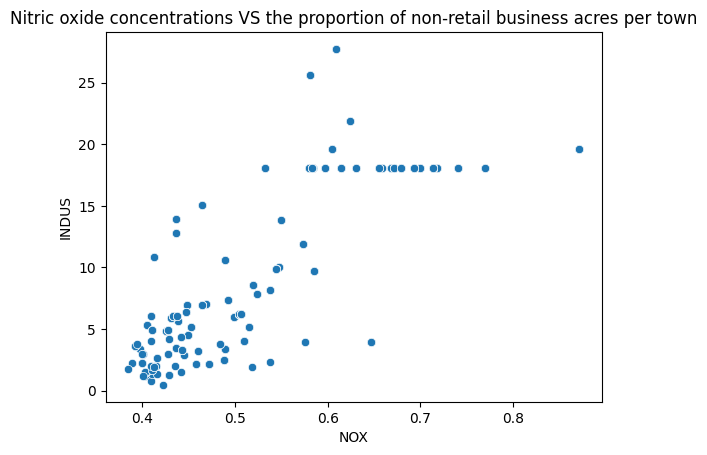

In [47]:
sns.scatterplot(data=boston_df,x='NOX',y='INDUS').set(title='Nitric oxide concentrations VS the proportion of non-retail business acres per town')

it follows a line going up in a line

[Text(0.5, 1.0, ' the pupil to teacher ratio variable')]

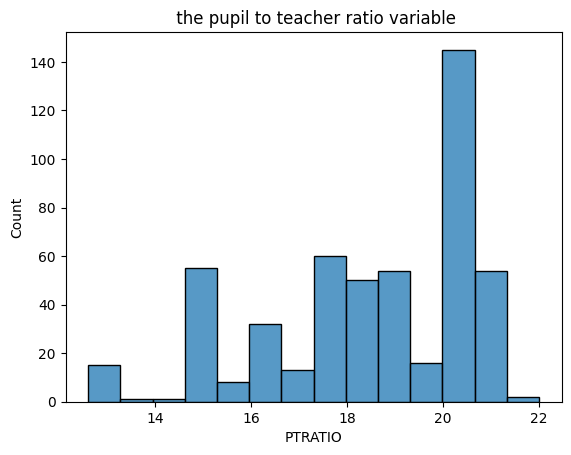

In [50]:
sns.histplot(data=boston_df,x='PTRATIO').set(title=' the pupil to teacher ratio variable')

Is there a significant difference in median value of houses bounded by the Charles river or not?

Hypothesis test

Ho: B1 = B2  (there is no difference in the median)

Ha: B1 != B2 (there is a difference in the median)

In [54]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='median')
# since the p-value is greater than 0.05 we can assume equality of variance

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

p value is less than 0.05 so the variance is not equal

In [60]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var=False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

P value is less than 0.05 so we reject the null hypothesis as there are not enough evidences that there is no difference

there is a significant difference in median value of houses bounded by the Charles river

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

Ho: there is no difference (B1 == B2)

Ha: there is a difference (B1 != B2)

In [56]:
scipy.stats.levene(boston_df[boston_df['age_range'] == 'under 35']['MEDV'],
                   boston_df[boston_df['age_range'] == 'between 35 and 70']['MEDV'],
                   boston_df[boston_df['age_range'] == 'above 70']['MEDV'],
                   center='median')

LeveneResult(statistic=3.471820890881101, pvalue=0.031806778061338456)

P value is less than 0.05 so variances are not equal

In [61]:
under35 = boston_df[boston_df['age_range'] == 'under 35']['MEDV']
between35_70 = boston_df[boston_df['age_range'] == 'between 35 and 70']['MEDV']
above70 = boston_df[boston_df['age_range'] == 'above 70']['MEDV']

In [62]:
f_statistic, p_value = scipy.stats.f_oneway(under35, between35_70, above70)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


P value is less than 0.05 so that we reject the null hypothesis as there are enough evidence that there is a difference

there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

IS there a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

Ho: there is no relation

Ha: there is a relation

[Text(0.5, 1.0, 'Nitric oxide concentrations VS the proportion of non-retail business acres per town')]

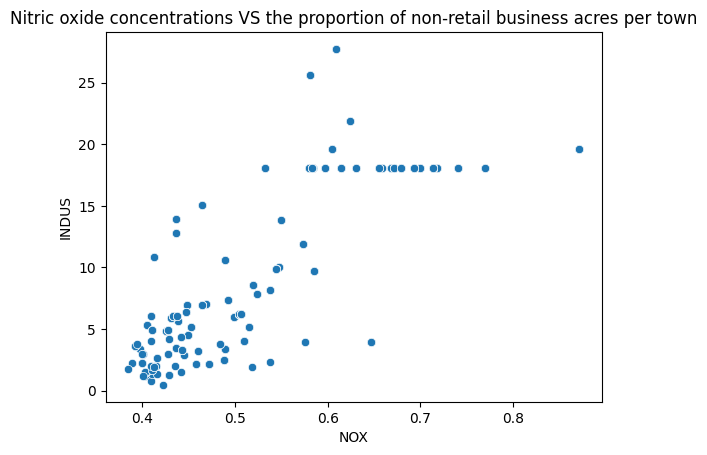

In [63]:
sns.scatterplot(data=boston_df,x='NOX',y='INDUS').set(title='Nitric oxide concentrations VS the proportion of non-retail business acres per town')

In [64]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

p value is smaller than 0.05 so we reject the null hypothesis and conclude that there is a relation between both of them

In [65]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
 14  age_range   506 non-null    object 
dtypes: float64(13), int64(1), object(1)
memory usage: 59.4+ KB


What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

Ho: dis has no effect on medv (B1 = 0)

Ha: dis has an effect on medv (B1 = 1)

In [67]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           1.21e-08
Time:                        15:06:02   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

correlation coefficient equals 0.25 so the impact is relativly small on the MEDV from the DIS